## Tema 4: Componentes de una Red Neuronal

### Resumen
En este notebook vamos a ver en detalle los componentes de una red así como posibles mejoras diseñadas para problemas específicos. Veremos:
- Funciones de activación
- Redes convolucionales
- Redes Recurrentes
- Funciones loss, métricas y optimizadores

Importamos los paquetes necesarios

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import LearningRateScheduler
import tensorflow as tf
from tensorflow.keras import backend as K
def show_history(history, metrics=['accuracy']):
    """
    Visualize history
    :param history:
    :return:
    """
    # Plot history: Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    for metric in metrics:
        # Plot history:
        plt.plot(history.history[metric])
        plt.plot(history.history['val_' + metric])
        plt.title(metric + ' history')
        plt.ylabel(metric + ' value (%)')
        plt.xlabel('No. epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
def step_decay(epochs_drop):
    def step_decay_fun(epoch):
        initial_lrate = 0.001
        drop = 0.000001
        lrate = initial_lrate * tf.math.pow(drop, 
tf.math.floor((1+epoch)/epochs_drop))
        return lrate
    return step_decay_fun
def r2_keras(y_true, y_pred):
    """
    Custom R2-score metrics for keras backend
    :param y_true: valor real
    :type y_true: Tensor
    :param y_pred: valor predicho
    :type y_pred: Tensor
    :return: r2 score
    :rtype: tensor
    """
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

In [7]:
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import LearningRateScheduler
import tensorflow as tf
from tensorflow.keras import backend as K
def show_history(history, metrics=['accuracy']):
    """
    Visualize history
    :param history:
    :return:
    """
    # Plot history: Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    for metric in metrics:
        # Plot history:
        plt.plot(history.history[metric])
        plt.plot(history.history['val_' + metric])
        plt.title(metric + ' history')
        plt.ylabel(metric + ' value (%)')
        plt.xlabel('No. epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
def step_decay(epochs_drop):
    def step_decay_fun(epoch):
        initial_lrate = 0.001
        drop = 0.000001
        lrate = initial_lrate * tf.math.pow(drop, 
tf.math.floor((1+epoch)/epochs_drop))
        return lrate
    return step_decay_fun
def r2_keras(y_true, y_pred):
    """
    Custom R2-score metrics for keras backend
    :param y_true: valor real
    :type y_true: Tensor
    :param y_pred: valor predicho
    :type y_pred: Tensor
    :return: r2 score
    :rtype: tensor
    """
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MSE, MAE
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import pandas as pd

Retomemos el problema del mnist

Número de elementos en el dataset =  70000


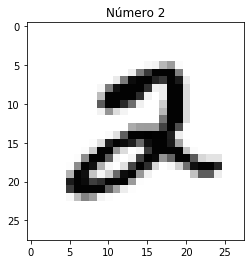

In [ ]:
%matplotlib inline
(X_train_mnist, y_train_mnist), (X_validation_mnist, y_validation_mnist) = mnist.load_data()

print('Número de elementos en el dataset = ',X_train_mnist.shape[0]+X_validation_mnist.shape[0])
plt.title('Número '+str(y_train_mnist[5]))
plt.imshow(X_train_mnist[5], cmap='Greys')
plt.show()

### Deep Model
Vamos a generar una red neuronal muy profunda para conseguir mejores resultados

In [ ]:
# capas de la red
input = Input(shape=(28,28))
x = layers.Flatten()(input)
for i in range(20):
    x = layers.Dense(units=20, activation='sigmoid')(x)
output = layers.Dense(units=10, activation='softmax')(x)

# creamos el modelo
deep_model = Model(inputs=input, outputs=output)
print(deep_model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
deep_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "functional_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 20)                15700     
_________________________________________________________________
dense_105 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_106 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_107 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_108 (Dense)            (None, 20)              

Entrenamos la red

In [ ]:
history = deep_model.fit(x=X_train_mnist, y=y_train_mnist, batch_size=20, epochs=10,
                           validation_data=(X_validation_mnist, y_validation_mnist))

Epoch 1/10
3000/3000 [==============================] - 3s 996us/step - loss: 2.3092 - accuracy: 0.1082 - val_loss: 2.3029 - val_accuracy: 0.1135
Epoch 2/10
3000/3000 [==============================] - 3s 913us/step - loss: 2.3022 - accuracy: 0.1103 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 3/10
3000/3000 [==============================] - 3s 944us/step - loss: 2.3019 - accuracy: 0.1111 - val_loss: 2.3030 - val_accuracy: 0.0980
Epoch 4/10
3000/3000 [==============================] - 3s 898us/step - loss: 2.3018 - accuracy: 0.1098 - val_loss: 2.3021 - val_accuracy: 0.1028
Epoch 5/10
3000/3000 [==============================] - 3s 942us/step - loss: 2.3021 - accuracy: 0.1111 - val_loss: 2.3021 - val_accuracy: 0.1010
Epoch 6/10
3000/3000 [==============================] - 3s 886us/step - loss: 2.3020 - accuracy: 0.1105 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 7/10
3000/3000 [==============================] - 3s 891us/step - loss: 2.3019 - accuracy: 0.1103 - val_loss: 2.3017 -

Vemos como a pesar de ser una red con una capacidad de aprendizaje mucho mayor el score obtenido no es bueno. Es lo que se conoce como vanishing gradient problem.

### Relu
Para solucionar este problema, una de las posibles opciones es utilizar funciones de activación lineales a trozos, como por ejemplo la función relu.

In [ ]:
# capas de la red
input = Input(shape=(28,28))
x = layers.Flatten()(input)
for i in range(20):
    x = layers.Dense(units=20, activation='relu')(x)
output = layers.Dense(units=10, activation='softmax')(x)

# creamos el modelo
deep_model = Model(inputs=input, outputs=output)
print(deep_model.summary())

# compilamos el modelo
deep_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "functional_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 20)                15700     
_________________________________________________________________
dense_147 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_148 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_149 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_150 (Dense)            (None, 20)              

In [ ]:
deep_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = deep_model.fit(x=X_train_mnist, y=y_train_mnist, batch_size=20, epochs=10,validation_data=(X_validation_mnist, y_validation_mnist))

Epoch 1/10
3000/3000 [==============================] - 4s 1ms/step - loss: 1.4096 - accuracy: 0.4415 - val_loss: 0.9621 - val_accuracy: 0.6025
Epoch 2/10
3000/3000 [==============================] - 3s 959us/step - loss: 0.6879 - accuracy: 0.7804 - val_loss: 0.5642 - val_accuracy: 0.8202
Epoch 3/10
3000/3000 [==============================] - 3s 954us/step - loss: 0.4648 - accuracy: 0.8741 - val_loss: 0.3824 - val_accuracy: 0.9026
Epoch 4/10
3000/3000 [==============================] - 3s 958us/step - loss: 0.3775 - accuracy: 0.8997 - val_loss: 0.3359 - val_accuracy: 0.9178
Epoch 5/10
3000/3000 [==============================] - 3s 914us/step - loss: 0.3584 - accuracy: 0.9033 - val_loss: 0.2901 - val_accuracy: 0.9222
Epoch 6/10
3000/3000 [==============================] - 3s 907us/step - loss: 0.2869 - accuracy: 0.9238 - val_loss: 0.2867 - val_accuracy: 0.9207
Epoch 7/10
3000/3000 [==============================] - 3s 881us/step - loss: 0.2802 - accuracy: 0.9262 - val_loss: 0.3083 - v

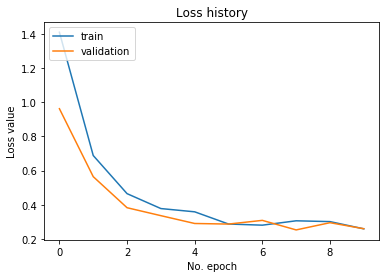

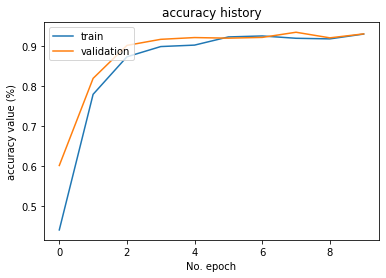

In [ ]:
show_history(history)

Elu
Si utilizamos la función Elu obtenemos un resultado similar

In [ ]:
# capas de la red
input = Input(shape=(28,28))
x = layers.Flatten()(input)
for i in range(20):
    x = layers.Dense(units=20, activation='elu')(x)
output = layers.Dense(units=10, activation='softmax')(x)

# creamos el modelo
deep_model = Model(inputs=input, outputs=output)
print(deep_model.summary())

# compilamos el modelo
deep_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "simple_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_85 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_86 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_87 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_88 (Dense)             (None, 20)               

In [ ]:
history = deep_model.fit(x=X_train_mnist, y=y_train_mnist, batch_size=20, epochs=10,validation_data=(X_validation_mnist, y_validation_mnist))

Epoch 1/10
3000/3000 [==============================] - 3s 956us/step - loss: 0.9248 - accuracy: 0.6963 - val_loss: 0.4365 - val_accuracy: 0.8823
Epoch 2/10
3000/3000 [==============================] - 3s 845us/step - loss: 0.4000 - accuracy: 0.8968 - val_loss: 0.3274 - val_accuracy: 0.9142
Epoch 3/10
3000/3000 [==============================] - 3s 892us/step - loss: 0.3160 - accuracy: 0.9171 - val_loss: 0.2862 - val_accuracy: 0.9246
Epoch 4/10
3000/3000 [==============================] - 3s 903us/step - loss: 0.2937 - accuracy: 0.9228 - val_loss: 0.2663 - val_accuracy: 0.9289
Epoch 5/10
3000/3000 [==============================] - 3s 907us/step - loss: 0.2641 - accuracy: 0.9308 - val_loss: 0.2579 - val_accuracy: 0.9302
Epoch 6/10
3000/3000 [==============================] - 3s 954us/step - loss: 0.2416 - accuracy: 0.9359 - val_loss: 0.2386 - val_accuracy: 0.9365
Epoch 7/10
3000/3000 [==============================] - 3s 873us/step - loss: 0.2527 - accuracy: 0.9334 - val_loss: 0.2740 -

### Regresión
Ahora, vamos a resolver un problema de regresión. Vamos a predecir el consumo de gasolina en función de ciertos parámetros del coche.

In [ ]:
# obtenemos el dataset
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                          na_values = "?", comment='\t',
                          sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
print(dataset.tail())
dataset = dataset.dropna()
dataset = dataset.drop('Origin', 1)

# generamos el dataset de entrenamiento y validacion
X_train_consumo = dataset.sample(frac=0.8,random_state=0)
X_validation_consumo = dataset.drop(X_train_consumo.index)

y_train_consumo = X_train_consumo.pop('MPG')
y_validation_consumo = X_validation_consumo.pop('MPG')

# Normalizamos respecto de la media y varianza de los datos de train
train_mean, train_std = X_train_consumo.mean(), X_train_consumo.std()
X_train_consumo = (X_train_consumo-train_mean)/train_std
X_validation_consumo = (X_validation_consumo-train_mean)/train_std

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1  


Vamos a construir una red para este problema de regresión

In [ ]:
# capas de la red
input = Input(shape=(6))
x = input
x = layers.Dense(units=200, activation='relu')(x)
x = layers.Dense(units=100, activation='relu')(x)
x = layers.Dense(units=50, activation='relu')(x)
x = layers.Dense(units=10, activation='relu')(x)

# no ponemos función de activación
output = layers.Dense(units=1, activation=None)(x)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# compilamos el modelo
model.compile(optimizer=SGD(learning_rate=0.001), loss='mse', metrics=['mse', r2_keras])

Model: "functional_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 6)]               0         
_________________________________________________________________
dense_207 (Dense)            (None, 200)               1400      
_________________________________________________________________
dense_208 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_209 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_210 (Dense)            (None, 10)                510       
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 11        
Total params: 27,071
Trainable params: 27,071
Non-trainable params: 0
_________________________________________________

In [ ]:
history = model.fit(x=X_train_consumo, y=y_train_consumo, batch_size=100, epochs=100,validation_data=(X_validation_consumo, y_validation_consumo))

Epoch 1/100
4/4 [==============================] - 0s 30ms/step - loss: 602.5728 - mse: 602.5728 - r2_keras: -11.0362 - val_loss: 625.6393 - val_mse: 625.6393 - val_r2_keras: -8.5800
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 581.3476 - mse: 581.3476 - r2_keras: -9.2010 - val_loss: 591.6123 - val_mse: 591.6123 - val_r2_keras: -8.0590
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 541.4961 - mse: 541.4962 - r2_keras: -10.9474 - val_loss: 523.7532 - val_mse: 523.7532 - val_r2_keras: -7.0199
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 451.4237 - mse: 451.4237 - r2_keras: -6.1906 - val_loss: 258.5534 - val_mse: 258.5534 - val_r2_keras: -2.9591
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 131.7213 - mse: 131.7213 - r2_keras: -0.8284 - val_loss: 20.5466 - val_mse: 20.5466 - val_r2_keras: 0.6854
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 21.4049 - mse: 21.4049 -

Veamos la evolución del loss y la metrica

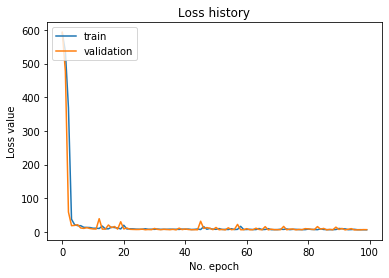

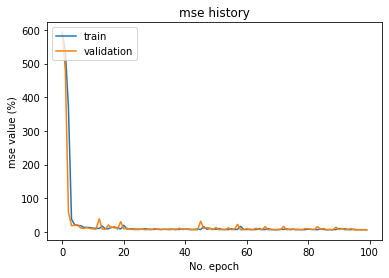

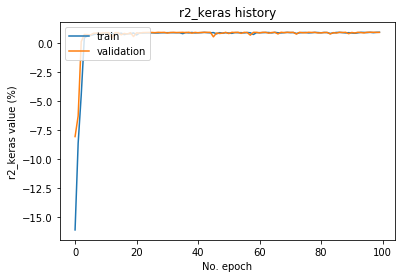

In [ ]:
show_history(history, metrics=['mse', 'r2_keras'])

¿Que pasa si ponemos el LR=1?

### Redes Convolucionales
Vamos de ver como implementar redes convolucionales para el análisis de imágenes
Trabajaremos con el dataset CIFAR 10

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train_cifar10, y_train_cifar10), (X_validation_cifar10, y_validation_cifar10) = cifar10.load_data()
X_train_cifar10 = X_train_cifar10/255
X_validation_cifar10 = X_validation_cifar10/255

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
# capas de la red
input = Input(shape=(32,32,3))
layer = Conv2D(filters=120, kernel_size=3, strides=1, padding='valid', activation='elu')(input)
layer = MaxPooling2D((1, 1))(layer)
layer = Conv2D(filters=190, kernel_size=3, strides=1, padding='valid', activation='elu')(layer)
layer = MaxPooling2D((1, 1))(layer)
layer = Conv2D(filters=220, kernel_size=3, strides=1, padding='valid', activation='elu')(layer)
layer = MaxPooling2D((1, 1))(layer)
layer = Flatten()(layer)
layer = Dense(units=200, activation='elu')(layer)
output = Dense(units=10, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(x=X_train_cifar10, y=y_train_cifar10, batch_size=30, epochs=20,
                    validation_data=(X_validation_cifar10, y_validation_cifar10))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 120)       3360      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 120)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 190)       205390    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 190)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 220)       3764

Veamos la evolución de los scores durante el entrenamiento

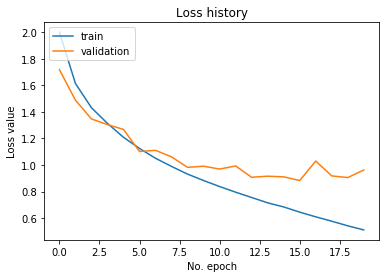

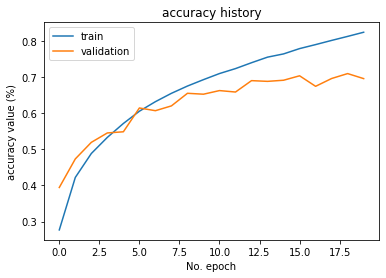

In [ ]:
show_history(history)

Parece que el modelo puede seguir mejorando, aunque empieza a presentar signos de overfiting.
Veamos cual es la confusion matrix.

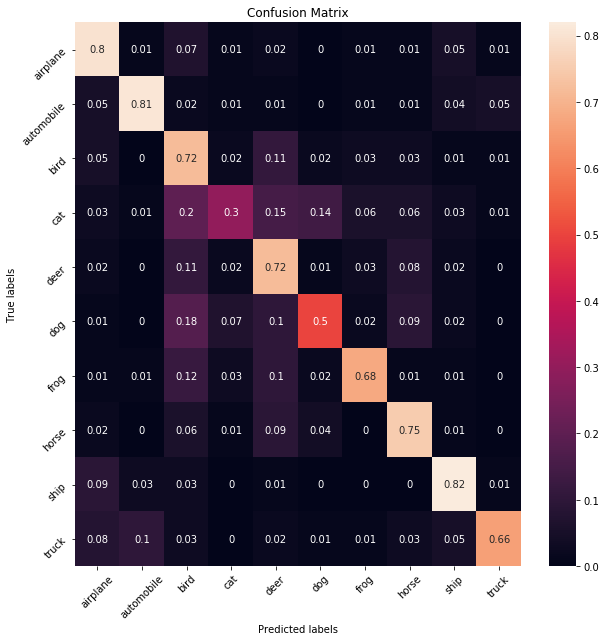

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_validation_cifar10), axis=-1)

plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_true=y_validation_cifar10, y_pred=y_pred, normalize='true', labels=range(10))
cm = np.around(cm, decimals=2)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  # annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation=45)
ax.yaxis.set_ticklabels(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation=45)
plt.show()

Probar en Google Colab:
- Cambiar las funciones de activación.
- Poner más filtros y neuronas.
- Probar a cambiar el maxpooling, los strides y el padding.

### Redes Recurrentes
En este apartado veremos como procesar datos, en particular una series temporal, con redes recurrentes.
Empecemos trabajando con el valor del bitcoin.

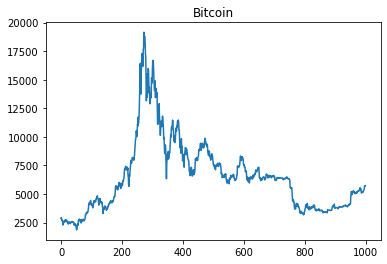

In [4]:
# Vamos a cargar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Dataset del valor del bitcoin por minuto
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data = np.array(data.Close.fillna(method='ffill'))[-2000000:-1000000]

# ploteamos los datos
plt.plot(data[::1000])
plt.title('Bitcoin')
plt.show()

# cuidado al hacer el split!!
data_train = data[:int(data.shape[0] * 0.6)]
data_test = data[int(data.shape[0] * 0.6):]

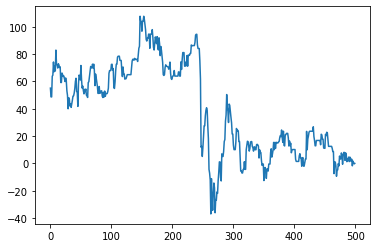

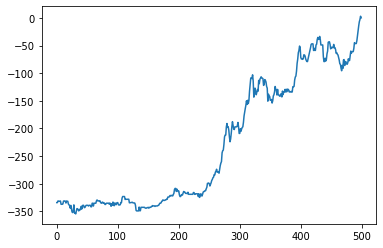

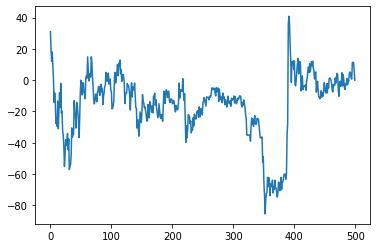

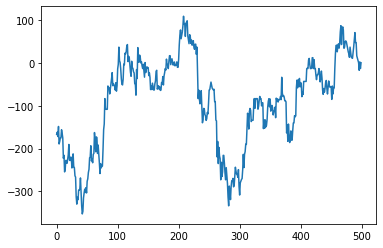

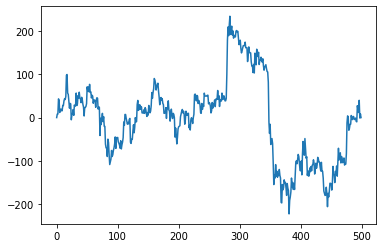

In [5]:
# Parámetros creación del dataset
# Longitud de la serie
w_size = 500

# Tiempo a futuro en el que predecimos
off_set = 10

# Función para generar un batch de elementos
# El generador que nos devuelve se lo pasaremos al método fit para entrenar
def get_bach(data, batch_size=500):
    while True:
        # seleccionamos unos cuantos índices aleatorios
        indexs = np.random.randint(0, data.shape[0] - w_size - off_set, batch_size)

        # generamos el batch
        X_bach = [data[x:x + w_size] for x in indexs]
        y_bach = data[indexs + w_size + off_set]

        # stackeamos
        X_bach = np.stack(X_bach, axis=0)
        y_bach = np.stack(y_bach, axis=0)


        # Cálculo del valor respecto del último valor obtenido
        y_bach = y_bach- X_bach[:, -1]
        X_bach = X_bach-X_bach[:,-1].reshape(-1,1)
        yield X_bach, y_bach

# Generamos un ejemplo de los elementos del dataset
a = get_bach(data_train, batch_size=3)
for _ in range(5):
    x, y = next(a)
    plt.plot(x[0, :])
    plt.show()

Creamos la red recurrente usando módulos LSTM con memoria a largo plazo

In [10]:
from tensorflow.keras.layers import LSTM, Dense

input_tensor = Input(shape=(w_size), dtype='float32')
x_0 = input_tensor

# Expandimos la dimensión de las features, el formato de entrada es (batch, time_steps, features)
x = tf.expand_dims(x_0, axis=-1)

for _ in range(3):
    x = LSTM(30, activation='tanh', recurrent_activation='sigmoid', return_sequences=True)(x)
x = LSTM(50, activation='tanh', recurrent_activation='sigmoid', return_sequences=False)(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation=tf.nn.leaky_relu)(x)
x = layers.Dense(100, activation=tf.nn.leaky_relu)(x)
x = layers.Dense(1, activation=None)(x)

model = Model(input_tensor, x)
print(model.summary())

# compilamos el modelo con varias métricas
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='mse',metrics=['mse', 'mean_absolute_error',r2_keras])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 500, 1)           0         
                                                                 
 lstm (LSTM)                 (None, 500, 30)           3840      
                                                                 
 lstm_1 (LSTM)               (None, 500, 30)           7320      
                                                                 
 lstm_2 (LSTM)               (None, 500, 30)           7320      
                                                                 
 lstm_3 (LSTM)               (None, 50)                16200     
                                                                 
 flatten (Flatten)           (None, 50)                0     

In [11]:
# Ahora tenemos que generar los dataset dinámicos para el entrenamiento
train_generator = get_bach(data_train, batch_size=100)
test_generator = get_bach(data_test, batch_size=100)

# Entrenamos el modelo con dichos generadores
history = model.fit(train_generator, epochs=5, steps_per_epoch=200, shuffle=False,
                    callbacks=[], verbose=1, validation_data=test_generator,validation_steps=10)

Epoch 1/5
 34/200 [====>.........................] - ETA: 1:04 - loss: 2470.1482 - mse: 2470.1482 - mean_absolute_error: 25.7456 - r2_keras: -0.0121

KeyboardInterrupt: ignored

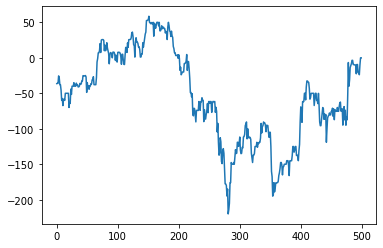

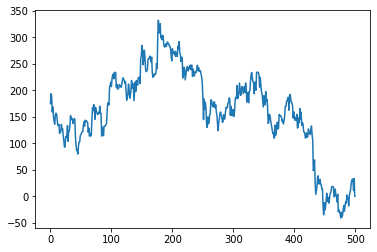

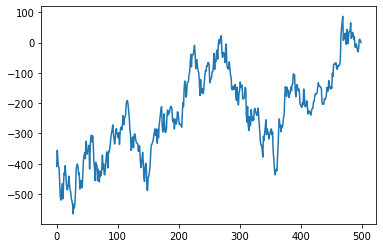

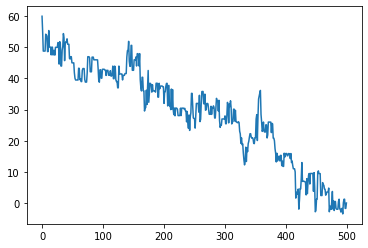

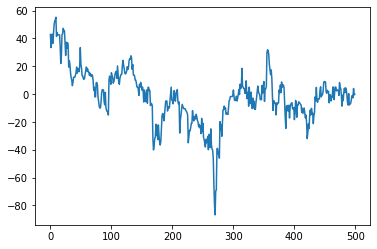

In [12]:
#EJERCICIO DE DEBAJO 

# Parámetros creación del dataset
# Longitud de la serie
w_size = 500

# Tiempo a futuro en el que predecimos
off_set = 10

# Función para generar un batch de elementos
# El generador que nos devuelve se lo pasaremos al método fit para entrenar
def get_bach(data, batch_size=500):
    while True:
        # seleccionamos unos cuantos índices aleatorios
        indexs = np.random.randint(0, data.shape[0] - w_size - off_set, batch_size)

        # generamos el batch
        X_bach = [data[x:x + w_size] for x in indexs]
        y_bach = data[indexs + w_size + off_set]

        # stackeamos
        X_bach = np.stack(X_bach, axis=0)
        y_bach = np.stack(y_bach, axis=0)


        # Cálculo del valor respecto del último valor obtenido
        y_bach = (y_bach- X_bach[:, -1]) > 0
        y_bach = y_bach *1
        X_bach = X_bach-X_bach[:,-1].reshape(-1,1)
        yield X_bach, y_bach

# Generamos un ejemplo de los elementos del dataset
a = get_bach(data_train, batch_size=3)
for _ in range(5):
    x, y = next(a)
    plt.plot(x[0, :])
    plt.show()

In [13]:
y

array([0, 1, 0])

In [18]:
input_tensor = Input(shape=(w_size), dtype='float32')
x_0 = input_tensor

# Expandimos la dimensión de las features, el formato de entrada es (batch, time_steps, features)
x = tf.expand_dims(x_0, axis=-1)

for _ in range(3):
    x = LSTM(30, activation='tanh', recurrent_activation='sigmoid', return_sequences=True)(x)
x = LSTM(50, activation='tanh', recurrent_activation='sigmoid', return_sequences=False)(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation=tf.nn.leaky_relu)(x)
x = layers.Dense(100, activation=tf.nn.leaky_relu)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(input_tensor, x)
print(model.summary())

# compilamos el modelo con varias métricas
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500)]             0         
                                                                 
 tf.expand_dims_2 (TFOpLambd  (None, 500, 1)           0         
 a)                                                              
                                                                 
 lstm_8 (LSTM)               (None, 500, 30)           3840      
                                                                 
 lstm_9 (LSTM)               (None, 500, 30)           7320      
                                                                 
 lstm_10 (LSTM)              (None, 500, 30)           7320      
                                                                 
 lstm_11 (LSTM)              (None, 50)                16200     
                                                           

In [19]:
# Ahora tenemos que generar los dataset dinámicos para el entrenamiento
train_generator = get_bach(data_train, batch_size=100)
test_generator = get_bach(data_test, batch_size=100)

# Entrenamos el modelo con dichos generadores
history = model.fit(train_generator, epochs=5, steps_per_epoch=200, shuffle=False,
                    callbacks=[], verbose=1, validation_data=test_generator,validation_steps=10)

Epoch 1/5
200/200 [==============================] - 122s 412ms/step - loss: 0.6899 - accuracy: 0.5368 - val_loss: 0.6876 - val_accuracy: 0.5490
Epoch 2/5
200/200 [==============================] - 80s 399ms/step - loss: 0.6903 - accuracy: 0.5347 - val_loss: 0.6858 - val_accuracy: 0.5590
Epoch 3/5
200/200 [==============================] - 80s 398ms/step - loss: 0.6885 - accuracy: 0.5410 - val_loss: 0.6870 - val_accuracy: 0.5590
Epoch 4/5
200/200 [==============================] - 80s 398ms/step - loss: 0.6884 - accuracy: 0.5369 - val_loss: 0.6880 - val_accuracy: 0.5650
Epoch 5/5
200/200 [==============================] - 79s 397ms/step - loss: 0.6875 - accuracy: 0.5431 - val_loss: 0.6871 - val_accuracy: 0.5340


El modelo no consigue obtener buenos resultados. El R2 score es casi 0. ¿Por que?
Probar en Google Colab:
- Generar un modelo de clasificación con capas recurrentes para predecir si el precio sube o baja
- Probar a cambiar el tamaño de la ventana y el tiempo futuro de predicción
- Cambiar la arquitectura de la red para intentar obtener un score R2 > 0

Trabajemos ahora con un dataset sintético.

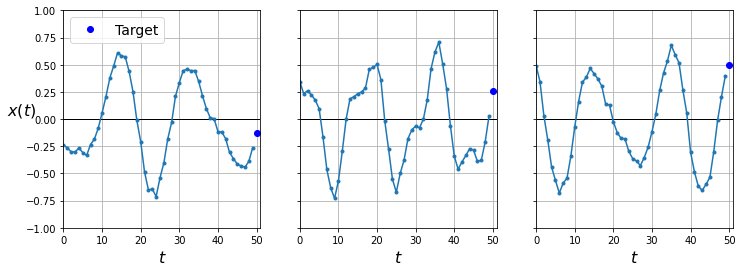

In [20]:
# Esta función genera una serie temporal seudo aleatoria con cierta periodicidad
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

# Generamos train, validation y test y 10k gráficas mediante las dos series temporales y el ruido de arriba
n_steps = 50 #50 valores de la serie dados y predecir el siguiente
series = generate_time_series(10000, n_steps + 1)
X_train_sequence, y_train_sequence = series[:7000, :n_steps], series[:7000, -1]
X_valid_sequence, y_valid_sequence = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test_sequence, y_test_sequence = series[9000:, :n_steps], series[9000:, -1]


# Función para plotear
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid_sequence[col, :, 0], y_valid_sequence[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

Creamos un modelo con módulos LSTM

In [21]:
input_tensor = Input(shape=(n_steps), dtype='float32')
x_0 = input_tensor
x = tf.expand_dims(x_0, axis=-1)

# Dependiendo de cual sea el output deberemos cambiar el valor 'return_sequences'
for _ in range(5):
    x = LSTM(100, activation='tanh', recurrent_activation='sigmoid', return_sequences=True)(x)
x = LSTM(200, activation='tanh', recurrent_activation='sigmoid', return_sequences=False)(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation=tf.nn.leaky_relu)(x)
x = layers.Dense(100, activation=tf.nn.leaky_relu)(x)
x = layers.Dense(1, activation=None)(x)

model = Model(input_tensor, x)
print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mse',metrics=['mse', 'mean_absolute_error',r2_keras])
history = model.fit(X_train_sequence,y_train_sequence, epochs=20, batch_size=30, steps_per_epoch=200, shuffle=False,
                    callbacks=[], verbose=1, validation_data=(X_valid_sequence, y_valid_sequence),validation_steps=10)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50)]              0         
                                                                 
 tf.expand_dims_3 (TFOpLambd  (None, 50, 1)            0         
 a)                                                              
                                                                 
 lstm_12 (LSTM)              (None, 50, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 50, 100)           80400     
                                                                 
 lstm_14 (LSTM)              (None, 50, 100)           80400     
                                                                 
 lstm_15 (LSTM)              (None, 50, 100)           80400     
                                                           

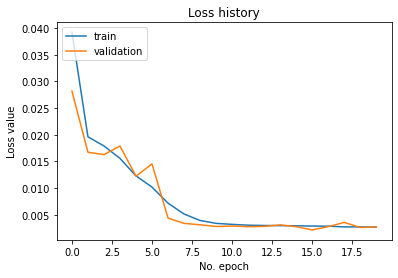

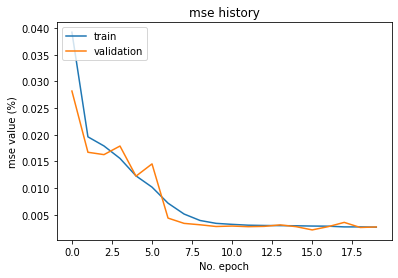

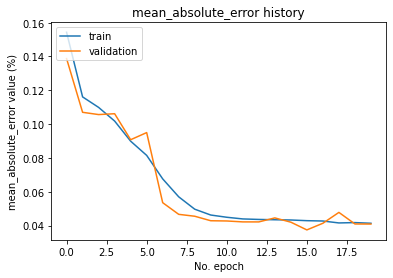

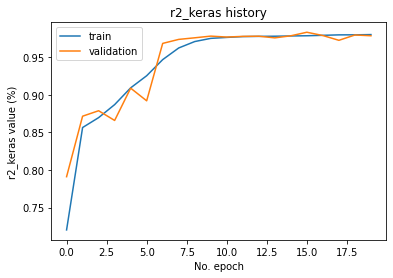

In [22]:
show_history(history, metrics=['mse', 'mean_absolute_error','r2_keras'])

El score es muy bueno, obteniendo 98 en R2.
Ahora vamos a predecir varios steps en adelante con el modelo.

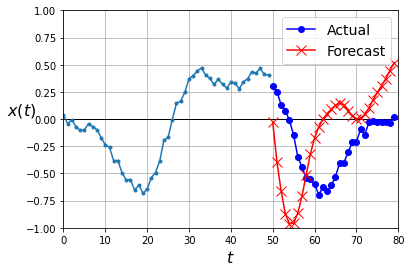

In [23]:
# Número de pasos en adelante que vamos a predecir
steps_ahead = 30
# cuantos pasos elimino, tomando las salidas como input de los pasos siguientes, descarto 30 observaciones 
# y con las 30 predicciones genero unas nuevas 30 predicciones
series = generate_time_series(1, n_steps + steps_ahead) # este 1 dice que va de 30 en 30, si fuera 2 60 en 60 y así
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

# repetimos la predicción varias veces
for step_ahead in range(steps_ahead):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

Probar en Google Colab:
- Otros módulos recurrentes
- Otras losses
- Hacer predicciones multiples

### Optimizadores, métricas y funciones loss
En este apartado veremos distintas funciones para mejorar el entrenamiento de nuestra red neuronal

Sin duda uno de los mejores optimizadores es el Adam, veamos que score obtenemos entrenando con el.
Probemos el optimizador Adam con un modelo convolucional sobre el dataset CIFAR10

In [ ]:
# capas de la red
input = Input(shape=(32,32,3))
layer = Conv2D(filters=20, kernel_size=3, strides=1, padding='same', activation='relu')(input)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=40, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=80, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Flatten()(layer)
layer = Dense(units=200, activation='relu')(layer)
output = Dense(units=10, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(x=X_train_cifar10, y=y_train_cifar10, batch_size=30, epochs=20,
                    validation_data=(X_validation_cifar10, y_validation_cifar10))

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 40)        7240      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 8, 8, 40)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 80)          28880     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 4, 4, 80)        

Hemos obtenido un 72% de accuracy en la epoch 4! en el dataset CIFAR 10
Con este optimizador la convergencia del modelo es muy rápida.
Además podemos apreciar en la próxima gráfica que se está generando overfiting.

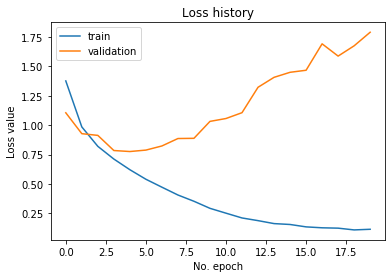

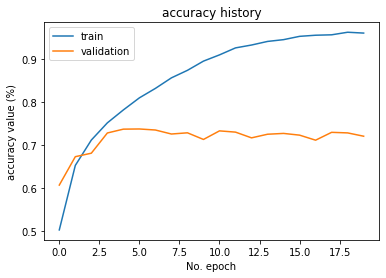

In [ ]:
show_history(history)

Ahora vamos a entrenar con una custom loss.

In [ ]:
# construimos una función loss que es una suma ponderada del MSE y el R2
def custom_loss(alpha):
    def custom_loss_fun(y_true, y_pred):
        return r2_keras(y_true, y_pred)*alpha + MSE(y_true, y_pred)
    return custom_loss_fun

Utilizamos el dataset de consumo de combustible

In [ ]:
# capas de la red
input = Input(shape=(6))
x = input
for i in range(3):
    x = layers.Dense(units=50, activation='relu')(x)
output = layers.Dense(units=1, activation=None)(x)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

from aux_func import r2_keras
# compilamos el modelo
model.compile(optimizer='Adam', loss=custom_loss(0.1), metrics=['mse', r2_keras])
history = model.fit(x=X_train_consumo, y=y_train_consumo, batch_size=50, epochs=200,validation_data=(X_validation_consumo, y_validation_consumo))

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 6)]               0         
_________________________________________________________________
dense_56 (Dense)             (None, 50)                350       
_________________________________________________________________
dense_57 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_58 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 51        
Total params: 5,501
Trainable params: 5,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
7/7 [==============================] - 0s 17ms/step - loss: 580.0611 - mse: 580.9548 - r2_keras: -8.

En GoogleColab probar en el dataset de consumo:
- Distintos optimizadores
- Distintas funciones loss
- Diseñar la función custom, beta*((y-y_pred)**4 + 2*abs(y-y_pred))+alpha*MSE(y_y_pred), y entrenar con ella.

In [24]:
# CUIDADO!
# Se puede hacer con cualquiera de los dos datasets
# Habría que fabricar una función loss porque no nos vale una función de regresión y otra de clasificación (porque hay
# un de clasificación (baja o sube) y otro de regresión (baja o sube))

#el alpha del bce (error de la clasificacion) es para escalar el rango [0,1] a la escala de la variable continua
